In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset = pd.read_csv('MSFT_df.csv')
dataset.count()


Date              2469
Open              2469
High              2469
Low               2469
Close             2469
Adj Close         2469
Volume            2469
Daily Returns     2469
50 Day MA         2469
Upper             2469
Lower             2469
Trading Signal    2469
Entry/Exit        2469
dtype: int64

In [3]:
# splitting dataframe by row index 
df_1 = dataset.iloc[:1728,:] 
df_2 = dataset.iloc[1729:,:]

df_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,50 Day MA,Upper,Lower,Trading Signal,Entry/Exit
0,2011-02-10,27.930000,27.940001,27.290001,27.500000,21.864422,76672400,-0.016804,27.9144,28.636182,26.778219,1.0,1.0
1,2011-02-11,27.760000,27.809999,27.070000,27.250000,21.665649,83939700,-0.009091,27.9386,28.268699,26.919901,1.0,0.0
2,2011-02-14,27.209999,27.270000,26.950001,27.230000,21.649748,56766200,-0.000734,27.9454,28.224377,26.951022,1.0,0.0
3,2011-02-15,27.040001,27.330000,26.950001,26.959999,21.561775,44116500,-0.009916,27.9442,27.959069,26.945130,1.0,0.0
4,2011-02-16,27.049999,27.070000,26.600000,27.020000,21.609766,70817900,0.002226,27.9478,28.004014,26.963787,1.0,0.0


In [4]:
training_set = df_1.iloc[:, 1:2].values
training_set

array([[27.93000031],
       [27.76000023],
       [27.20999908],
       ...,
       [87.12000275],
       [86.34999847],
       [86.19999695]])

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60,1728):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [44]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
53/53 [==============================] - 7s 139ms/step - loss: 0.0179
Epoch 2/100
53/53 [==============================] - 8s 142ms/step - loss: 0.0026
Epoch 3/100
53/53 [==============================] - 8s 146ms/step - loss: 0.0025
Epoch 4/100
53/53 [==============================] - 8s 146ms/step - loss: 0.0025
Epoch 5/100
53/53 [==============================] - 8s 142ms/step - loss: 0.0024
Epoch 6/100
53/53 [==============================] - 8s 145ms/step - loss: 0.0022
Epoch 7/100
53/53 [==============================] - 8s 144ms/step - loss: 0.0021
Epoch 8/100
53/53 [==============================] - 8s 150ms/step - loss: 0.0022
Epoch 9/100
53/53 [==============================] - 8s 148ms/step - loss: 0.0022
Epoch 10/100
53/53 [==============================] - 8s 150ms/step - loss: 0.0022
Epoch 11/100
53/53 [==============================] - 8s 148ms/step - loss: 0.0018
Epoch 12/100
53/53 [==============================] - 8s 148ms/step - loss: 0.0019
Epoch 13/100


In [45]:
# Evaluate the model
regressor.evaluate(X_test)

1/1 [==============================] - 0s 978us/step - loss: 0.0000e+00


0.0

In [53]:
# Getting the predicted stock price 
dataset_total = pd.concat((df_1['Open'], df_2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 746):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

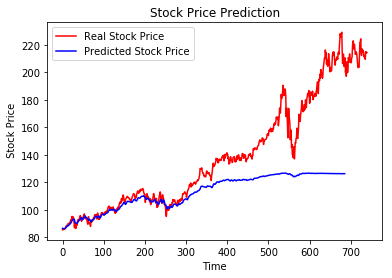

In [54]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
#Please double check the code. 